 **Script for Challegne 5
Author : Aditya Lahiri**

In [0]:
import pandas as pd
from google.colab import files 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uploaded_training = files.upload()


Saving 5challenge_training_alahiri2.csv to 5challenge_training_alahiri2.csv


In [3]:
uploaded_testing = files.upload()


Saving 5challenge_testing_alahiri2.csv to 5challenge_testing_alahiri2.csv


In [4]:
for fn1 in uploaded_training.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn1, length=len(uploaded_training[fn1])))
for fn2 in uploaded_testing.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn2, length=len(uploaded_testing[fn2])))

User uploaded file "5challenge_training_alahiri2.csv" with length 9153 bytes
User uploaded file "5challenge_testing_alahiri2.csv" with length 8960 bytes


Create the training and test data set.

In [0]:
import io 
train_df=pd.read_csv(io.StringIO(uploaded_training['5challenge_training_alahiri2.csv'].decode('cp1252')),index_col=0)
test_df=pd.read_csv(io.StringIO(uploaded_testing['5challenge_testing_alahiri2.csv'].decode('cp1252')),index_col=0)

In [6]:
train_df.head(2)

,Class,Feature 0,Feature 1
0,1,2.251906,-0.680615
1,0,1.187075,2.096370


In [7]:
test_df.head(2)

,Class,Feature 0,Feature 1
0,NaN,0.188625,0.268878
1,NaN,-0.647692,1.171407


Create the test and train vectors

In [8]:
X_Train= train_df[['Feature 0', 'Feature 1']].values
Y_Train = train_df[['Class']].values.ravel()
X_Test=test_df[['Feature 0', 'Feature 1']].values
Y_Train

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1])

Create the training scatter plot

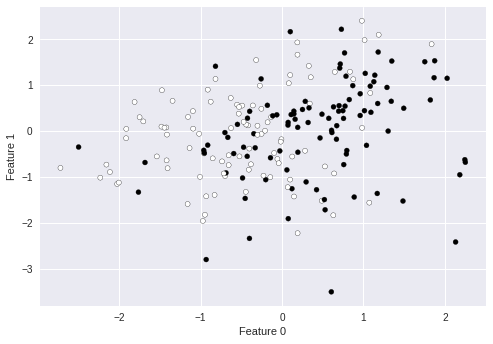

In [9]:
plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train, marker='o',s=25, edgecolor='k')
plt.ylabel('Feature 1')
plt.xlabel('Feature 0')
plt.show()

Create bar plot to see if the training dataset has balanced on unbalanced classes

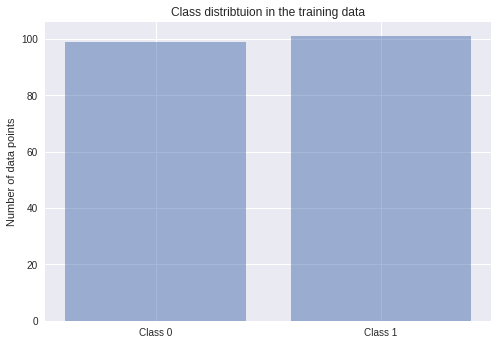

In [10]:
count_0= (Y_Train[Y_Train==0].shape)[0]
count_1= (Y_Train[Y_Train==1].shape)[0]

objects = ('Class 0', 'Class 1')
y_pos = np.arange(len(objects))
performance = [count_0,count_1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of data points')
plt.title('Class distribtuion in the training data')
 
plt.show()

**Create all the types of svm classifiers to get an idea of which performs better**





In [0]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier_poly = SVC(kernel = 'poly', degree=3, random_state = 0)

**Train the classifiers and cross validate against accuracy. Compute the mean validation accuracy.**

In [12]:
from sklearn.cross_validation import cross_val_score
scores_linear=cross_val_score(classifier_linear,X_Train,Y_Train,cv=10,scoring='accuracy')
scores_rbf=cross_val_score(classifier_rbf,X_Train,Y_Train,cv=10,scoring='accuracy')
scores_sig=cross_val_score(classifier_sig,X_Train,Y_Train,cv=10,scoring='accuracy')
scores_poly=cross_val_score(classifier_poly,X_Train,Y_Train,cv=10,scoring='accuracy')

print(scores_linear.mean())
print(scores_rbf.mean())
print(scores_sig.mean())
print(scores_poly.mean())


0.6903258145363409
0.7151127819548873
0.6647744360902255
0.6250626566416041


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Based on the validation accuracies it seems the rbf and linear kernels have the highest acuracies. So let's use grid search and cross validation on linear and rbf kernels to get the best parameters for the model. The C and Gamma values below were designed after measuring accuries across multiple iterations.**

In [15]:
C_range=np.linspace(0.1,6,20,endpoint=False)
gamma_range=np.linspace(0.1,2,20,endpoint=False)
gamma_range

array([0.1  , 0.195, 0.29 , 0.385, 0.48 , 0.575, 0.67 , 0.765, 0.86 ,
       0.955, 1.05 , 1.145, 1.24 , 1.335, 1.43 , 1.525, 1.62 , 1.715,
       1.81 , 1.905])

In [19]:
gamma_range_gauss=np.linspace(0.1,1,20,endpoint=False)
gamma_range_gauss

array([0.1  , 0.145, 0.19 , 0.235, 0.28 , 0.325, 0.37 , 0.415, 0.46 ,
       0.505, 0.55 , 0.595, 0.64 , 0.685, 0.73 , 0.775, 0.82 , 0.865,
       0.91 , 0.955])

In [20]:
C_range_gauss=np.linspace(0.1,7,20,endpoint=False)
C_range_gauss

array([0.1  , 0.445, 0.79 , 1.135, 1.48 , 1.825, 2.17 , 2.515, 2.86 ,
       3.205, 3.55 , 3.895, 4.24 , 4.585, 4.93 , 5.275, 5.62 , 5.965,
       6.31 , 6.655])

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': C_range, 'kernel': ['rbf'], 'gamma':gamma_range},
               {'C': C_range_gauss, 'kernel': ['linear'],'gamma':gamma_range_gauss}]

In [0]:
classifier = SVC(kernel = 'rbf', random_state = 0)


In [0]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)


In [0]:
grid_search = grid_search.fit(X_Train, Y_Train)


**Prin the best accuracies and parameters for the model**




In [25]:
best_accuracy = grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

0.75
{'C': 5.705, 'gamma': 0.1, 'kernel': 'rbf'}


**Predict using the best model and print the confusion matrix**

In [0]:
clf_best=grid_search.best_estimator_ 
y_best=clf_best.predict(X_Train)



In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm_best =confusion_matrix(y_best,Y_Train)
print(cm_best)
accuracy_score(y_best,Y_Train)

[[84 34]
 [15 67]]


0.755

In [28]:
Y_Test=clf_best.predict(X_Test)
test_df.Class=Y_Test
test_df.head(10)

,Class,Feature 0,Feature 1
0,1,0.188625,0.268878
1,0,-0.647692,1.171407
2,0,-0.544516,-0.430862
3,0,-1.310452,-1.272891
4,1,1.179387,-0.077999
5,0,-0.032617,2.934944
6,0,-0.266764,-2.119359
7,0,-1.299160,-1.862511
8,1,0.527060,1.021785
9,1,1.048228,1.746483


**Create the boundary decision plot on the training set.**





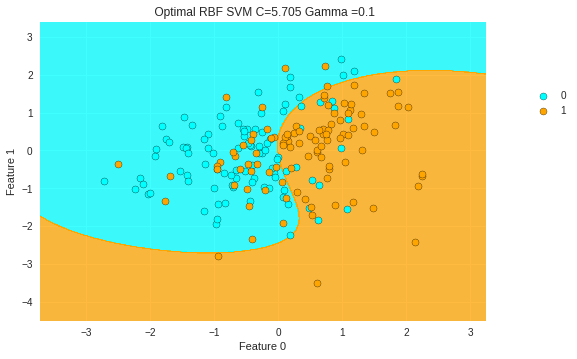

In [29]:
from matplotlib.colors import ListedColormap
from matplotlib import pylab

X_set, y_set = X_Train, Y_Train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax=plt.contourf(X1, X2, clf_best.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],edgecolors='k',
                c = ListedColormap(('cyan', 'orange'))(i), label = j)
plt.title(' Optimal RBF SVM C=5.705 Gamma =0.1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper right',  bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
plt.show()

In [0]:
test_df.to_csv('5challenge_testing_alahiri2.csv',sep=',')

In [0]:
files.download("5challenge_testing_alahiri2.csv")